# Geographic Information Preservation from SVAE


In [1]:
!gdown --id 1MSNlISlIX8QUhSOUjMdaYwYydg2K7FR2

Downloading...
From: https://drive.google.com/uc?id=1MSNlISlIX8QUhSOUjMdaYwYydg2K7FR2
To: /content/Spearman.plk
100% 3.02M/3.02M [00:00<00:00, 95.7MB/s]


In [2]:
import pandas as pd
df = pd.read_pickle('Spearman.plk')

In [3]:
df

,Id,Date,Title,Location,lat_long,DBERTML,SVAE
0,20201201063000-34,2020-12-01,What you need to know about the coronavirus ri...,"[1#Australia#AS#AS#-25#135#AS, 1#Japan#JA#JA#3...","[39.0, 22.0]","[-0.0072576646, -0.02582291, -0.003682414, 0.0...","[2.1830099, 0.92051065]"
1,20201201041500-T84,2020-12-01,Hotspot Hildburghausen - Coronavirus: Erstmals...,"[4#Hildburghausen, ThüN, Germany#GM#GM15#50.41...","[48.5833, 13.4833]","[0.0046650707, 0.015381211, -0.0039752894, -0....","[2.1360977, 0.9127404]"
2,20201201183000-486,2020-12-01,Drop in new coronavirus cases continues as Tee...,"[4#Middlesbrough, Redcar And Cleveland, United...","[54.6861, -1.2125]","[0.011455059, -0.01913472, 0.047539406, 0.0005...","[2.213049, 0.9966634]"
3,20201201014500-T434,2020-12-01,Coronavirus: Hospital de Rusia dice que inici&...,"[4#Rossiya, Orenburgskaya Oblast', Russia#RS#R...","[59.8944, 30.2642]","[0.048162363, 0.019175265, 0.038116246, -0.017...","[2.5785754, 1.1004764]"
4,20201201193000-1808,2020-12-01,Coronavirus live updates: Ex-CDC head warns of...,"[1#Puerto Rico#RQ#RQ#18.2359#-66.4838#RQ, 1#Ge...","[26.0, 50.5]","[-0.006703769, 0.011988984, 0.016676728, -0.00...","[2.7467365, 1.2118453]"
...,...,...,...,...,...,...,...
1195,20190922221500-175,2019-09-22,Surf Curse envelops Great American Music Hall ...,"[2#Nevada, United States#US#USNV#38.4199#-117....","[39.828175, -98.5795]","[-0.033044953, 0.07393407, -0.04212451, -0.040...","[1.1370866, 0.52174604]"
1196,20190922234500-864,2019-09-22,"Lil Nas X, Monsta X, And 9 More Surprises From...","[1#United States#US#US#39.828175#-98.5795#US, ...","[54.0, -4.0]","[-0.0016908045, 0.039071925, -0.10047092, -0.0...","[1.189237, 0.6030717]"
1197,20190922201500-419,2019-09-22,KORN's JONATHAN DAVIS Picks OZZY OSBOURNE As H...,"[3#Sacramento, California, United States#US#US...","[39.828175, -98.5795]","[0.052535586, 0.012243916, 0.0142680155, -0.04...","[1.2347138, 0.4958021]"
1198,20190922233000-917,2019-09-22,German orchestra performs Chinese music markin...,"[1#Germany#GM#GM#51.5#10.5#GM, 4#Beijing, Beij...","[37.7575, 119.076]","[-0.037184365, 0.04114759, -0.05080799, -0.045...","[0.88296753, 0.39354628]"


# BERT Experiment




In [5]:
from scipy.spatial.distance import euclidean
import random
from scipy.stats import spearmanr
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [6]:
matrix_distance_bert = []
matrix_distance_ll = []

repetitions = 5000

for k in range(repetitions): 

  seed = k

  random.seed(seed)
  
  matrix_distance_bert.append([])
  matrix_distance_ll.append([])

  for w in range(30): 
    i = random.randint(0, 1000)
    j = random.randint(0, 1000)
    while (i == j):
      j = random.randint(0, 1000)

    dist_bert = euclidean(df['DBERTML'][i], df['DBERTML'][j])
    bsas_in_radians = [radians(_) for _ in df['lat_long'][i]]
    paris_in_radians = [radians(_) for _ in df['lat_long'][j]]
    dist_ll = haversine_distances([bsas_in_radians, paris_in_radians])
    matrix_distance_bert[k].append(dist_bert)
    matrix_distance_ll[k].append(dist_ll[0][1])
  
  for w in range(30):
    g = random.randint(0, 1000)
    o = random.randint(1000, 1199)

    dist_bert = euclidean(df['DBERTML'][g], df['DBERTML'][o])
    bsas_in_radians = [radians(_) for _ in df['lat_long'][g]]
    paris_in_radians = [radians(_) for _ in df['lat_long'][o]]
    dist_ll = haversine_distances([bsas_in_radians, paris_in_radians])
    matrix_distance_bert[k].append(dist_bert)
    matrix_distance_ll[k].append(dist_ll[0][1])
  
l = []

for i in range(repetitions):
  sc, pv = spearmanr(matrix_distance_bert[i], matrix_distance_ll[i])
  l.append(abs(sc))

np.mean(l)

0.15787808099993217

In [7]:
df1 = pd.DataFrame(l)

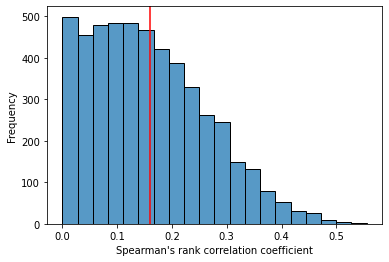

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(data=df1, x=0,bins=20)
ax.set(xlabel='Spearman\'s rank correlation coefficient', ylabel='Frequency')

plt.axvline(0.16, 0, 1, color='red')

plt.savefig('spearman_geo_test1.pdf')
plt.show()

In [11]:
df1[df1[0] > 0.16]

,0
3,0.163744
14,0.164937
15,0.461030
16,0.192442
17,0.183051
...,...
4990,0.328147
4991,0.199222
4994,0.198613
4995,0.306807


# SVAE Experiment


In [12]:
matrix_distance_svae = []
matrix_distance_ll = []

repeticoes = 5000

for k in range(repetitions): 

  seed = k

  random.seed(seed)
  
  matrix_distance_svae.append([])
  matrix_distance_ll.append([])

  for w in range(30):
    i = random.randint(0, 1000)
    j = random.randint(0, 1000)
    while (i == j):
      j = random.randint(0, 1000)

    dist_svae = euclidean(df['SVAE'][i], df['SVAE'][j])
    bsas_in_radians = [radians(_) for _ in df['lat_long'][i]]
    paris_in_radians = [radians(_) for _ in df['lat_long'][j]]
    dist_ll = haversine_distances([bsas_in_radians, paris_in_radians])
    matrix_distance_svae[k].append(dist_svae)
    matrix_distance_ll[k].append(dist_ll[0][1])
  
  for w in range(30): 
    g = random.randint(0, 1000)
    o = random.randint(1000, 1199)

    dist_svae = euclidean(df['SVAE'][g], df['SVAE'][o])
    bsas_in_radians = [radians(_) for _ in df['lat_long'][g]]
    paris_in_radians = [radians(_) for _ in df['lat_long'][o]]
    dist_ll = haversine_distances([bsas_in_radians, paris_in_radians])
    matrix_distance_svae[k].append(dist_svae)
    matrix_distance_ll[k].append(dist_ll[0][1])
  
l = []

for i in range(repetitions):
  sc, pv = spearmanr(matrix_distance_svae[i], matrix_distance_ll[i])
  l.append(abs(sc))

np.mean(l)

0.144956131862649

In [13]:
df2 = pd.DataFrame(l)

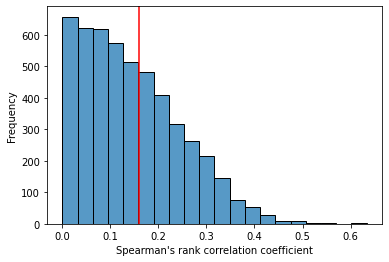

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(data=df2, x=0,bins=20)
ax.set(xlabel='Spearman\'s rank correlation coefficient', ylabel='Frequency')

plt.axvline(0.16, 0, 1, color='red')

plt.savefig('spearman_geo_test2.pdf')
plt.show()

In [15]:
df2[df2[0] > 0.16]

,0
2,0.183996
3,0.202562
12,0.169522
15,0.360110
16,0.223118
...,...
4993,0.219873
4994,0.234485
4995,0.219672
4996,0.280832
